In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, FunctionTransformer
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv(r'/media/bavinhnguyen2704/V_user/Data_MindX/Course_3/Final/Project/Data/Restaurant_revenue.csv')
df.head(5)

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0


<h2 style= "color:orange;"> Inspecting Dataframe Structure </h2>

### Size

In [3]:
df.shape

(137, 43)

### Datatypes

In [4]:
df.dtypes.value_counts()

int64      30
float64     9
object      4
Name: count, dtype: int64

### General Infor

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 43 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          137 non-null    int64  
 1   Open Date   137 non-null    object 
 2   City        137 non-null    object 
 3   City Group  137 non-null    object 
 4   Type        137 non-null    object 
 5   P1          137 non-null    int64  
 6   P2          137 non-null    float64
 7   P3          137 non-null    float64
 8   P4          137 non-null    float64
 9   P5          137 non-null    int64  
 10  P6          137 non-null    int64  
 11  P7          137 non-null    int64  
 12  P8          137 non-null    int64  
 13  P9          137 non-null    int64  
 14  P10         137 non-null    int64  
 15  P11         137 non-null    int64  
 16  P12         137 non-null    int64  
 17  P13         137 non-null    float64
 18  P14         137 non-null    int64  
 19  P15         137 non-null    i

<h2 style= "color:orange;"> Mini Preprocessing </h2>

In [6]:
df = df.drop(columns = ['Id'])

In [7]:
df['Open Date'] = pd.to_datetime(df['Open Date'], format= '%m/%d/%Y')
df['Opened_range_time'] = (df['Open Date'] - df['Open Date'].min()).dt.days
df = df.drop(columns=['Open Date'])
df['Opened_range_time']

0      1165
1      4299
2      6149
3      5748
4      4749
       ... 
132    4431
133    3809
134    3713
135    5287
136    4864
Name: Opened_range_time, Length: 137, dtype: int64

In [8]:
df['City_Group'] = df['City Group']
df = df.drop(columns= ['City Group'])

<h2 style= "color:orange;"> Dataframe Content Inspection </h2>

### Null-values checks

In [9]:
null_data_check = df.isna().any()
for col in null_data_check.index:
    if null_data_check.loc[col] == True:
        print(col)
    else:
        continue


### Unique Values Checks

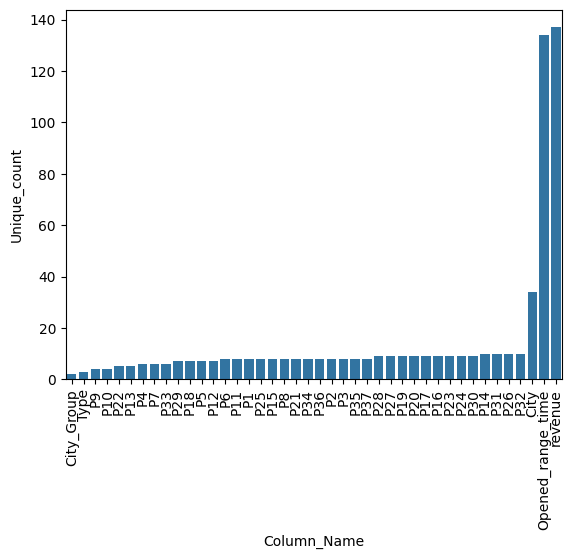

In [10]:
unique_distribution = pd.DataFrame(df.nunique()).reset_index().rename(columns={'index':'Column_Name',0:'Unique_count'}).sort_values(by= 'Unique_count')
sns.barplot(data= unique_distribution, x= 'Column_Name', y='Unique_count')
plt.xticks(rotation = 90)
plt.show()

### Value Behavior

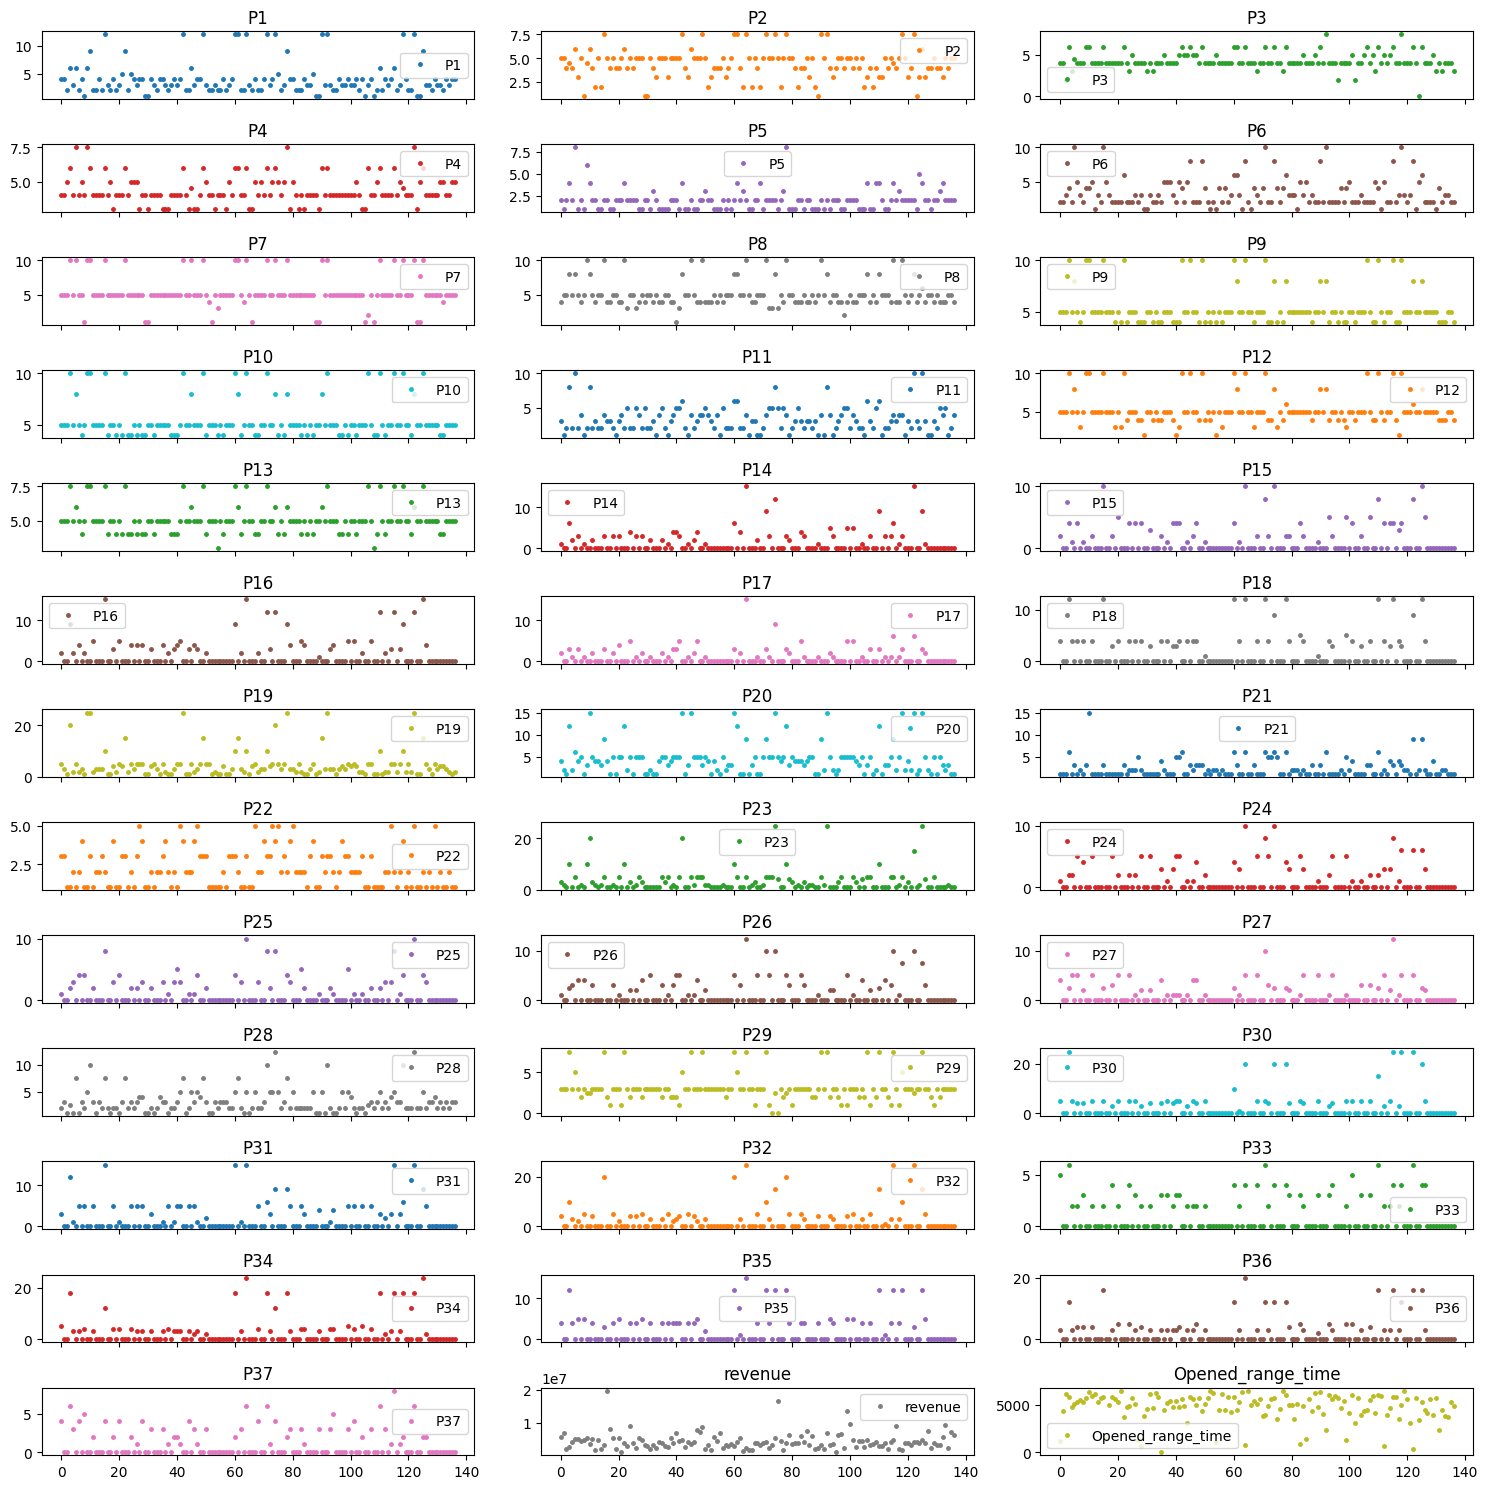

'\n-lw: Line Width\n-marker: marker format\n-subplots: each column for each plot\n-layout: row x column (-1: auto pick)\n'

In [11]:
axes = df.plot(lw=0, marker='.', subplots=True, layout=(-1, 3), figsize=(15, 15), markersize=5)
for ax, col in zip(axes.flatten(), df.select_dtypes(['int64', 'float64']).columns):
    ax.set_title(col)
plt.tight_layout()
plt.show()
'''
-lw: Line Width
-marker: marker format
-subplots: each column for each plot
-layout: row x column (-1: auto pick)
'''

<h2 style= "color:orange;"> Univariate Analysis </h2>

### Summary for Columns

In [12]:
#For numerical columns
df.describe()

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,P30,P31,P32,P33,P34,P35,P36,P37,revenue,Opened_range_time
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,...,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,1.370000e+02,137.000000
mean,4.014599,4.408759,4.317518,4.372263,2.007299,3.357664,5.423358,5.153285,5.445255,5.489051,...,2.729927,1.941606,2.525547,1.138686,2.489051,2.029197,2.211679,1.116788,4.453533e+06,4700.737226
std,2.910391,1.514900,1.032337,1.016462,1.209620,2.134235,2.296809,1.858567,1.834793,1.847561,...,5.536647,3.512093,5.230117,1.698540,5.165093,3.436272,4.168211,1.790768,2.576072e+06,1471.257507
min,1.000000,1.000000,0.000000,3.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.149870e+06,0.000000
25%,2.000000,4.000000,4.000000,4.000000,1.000000,2.000000,5.000000,4.000000,4.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.999068e+06,4224.000000
50%,3.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,5.000000,5.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.939804e+06,5039.000000
75%,4.000000,5.000000,5.000000,5.000000,2.000000,4.000000,5.000000,5.000000,5.000000,5.000000,...,4.000000,3.000000,3.000000,2.000000,3.000000,4.000000,3.000000,2.000000,5.166635e+06,5705.000000
max,12.000000,7.500000,7.500000,7.500000,8.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,25.000000,15.000000,25.000000,6.000000,24.000000,15.000000,20.000000,8.000000,1.969694e+07,6471.000000


In [13]:
#For categorical columns
df.describe(exclude=['int64', 'float64'])

,City,Type,City_Group
count,137,137,137
unique,34,3,2
top,İstanbul,FC,Big Cities
freq,50,76,78


### Column Distribution

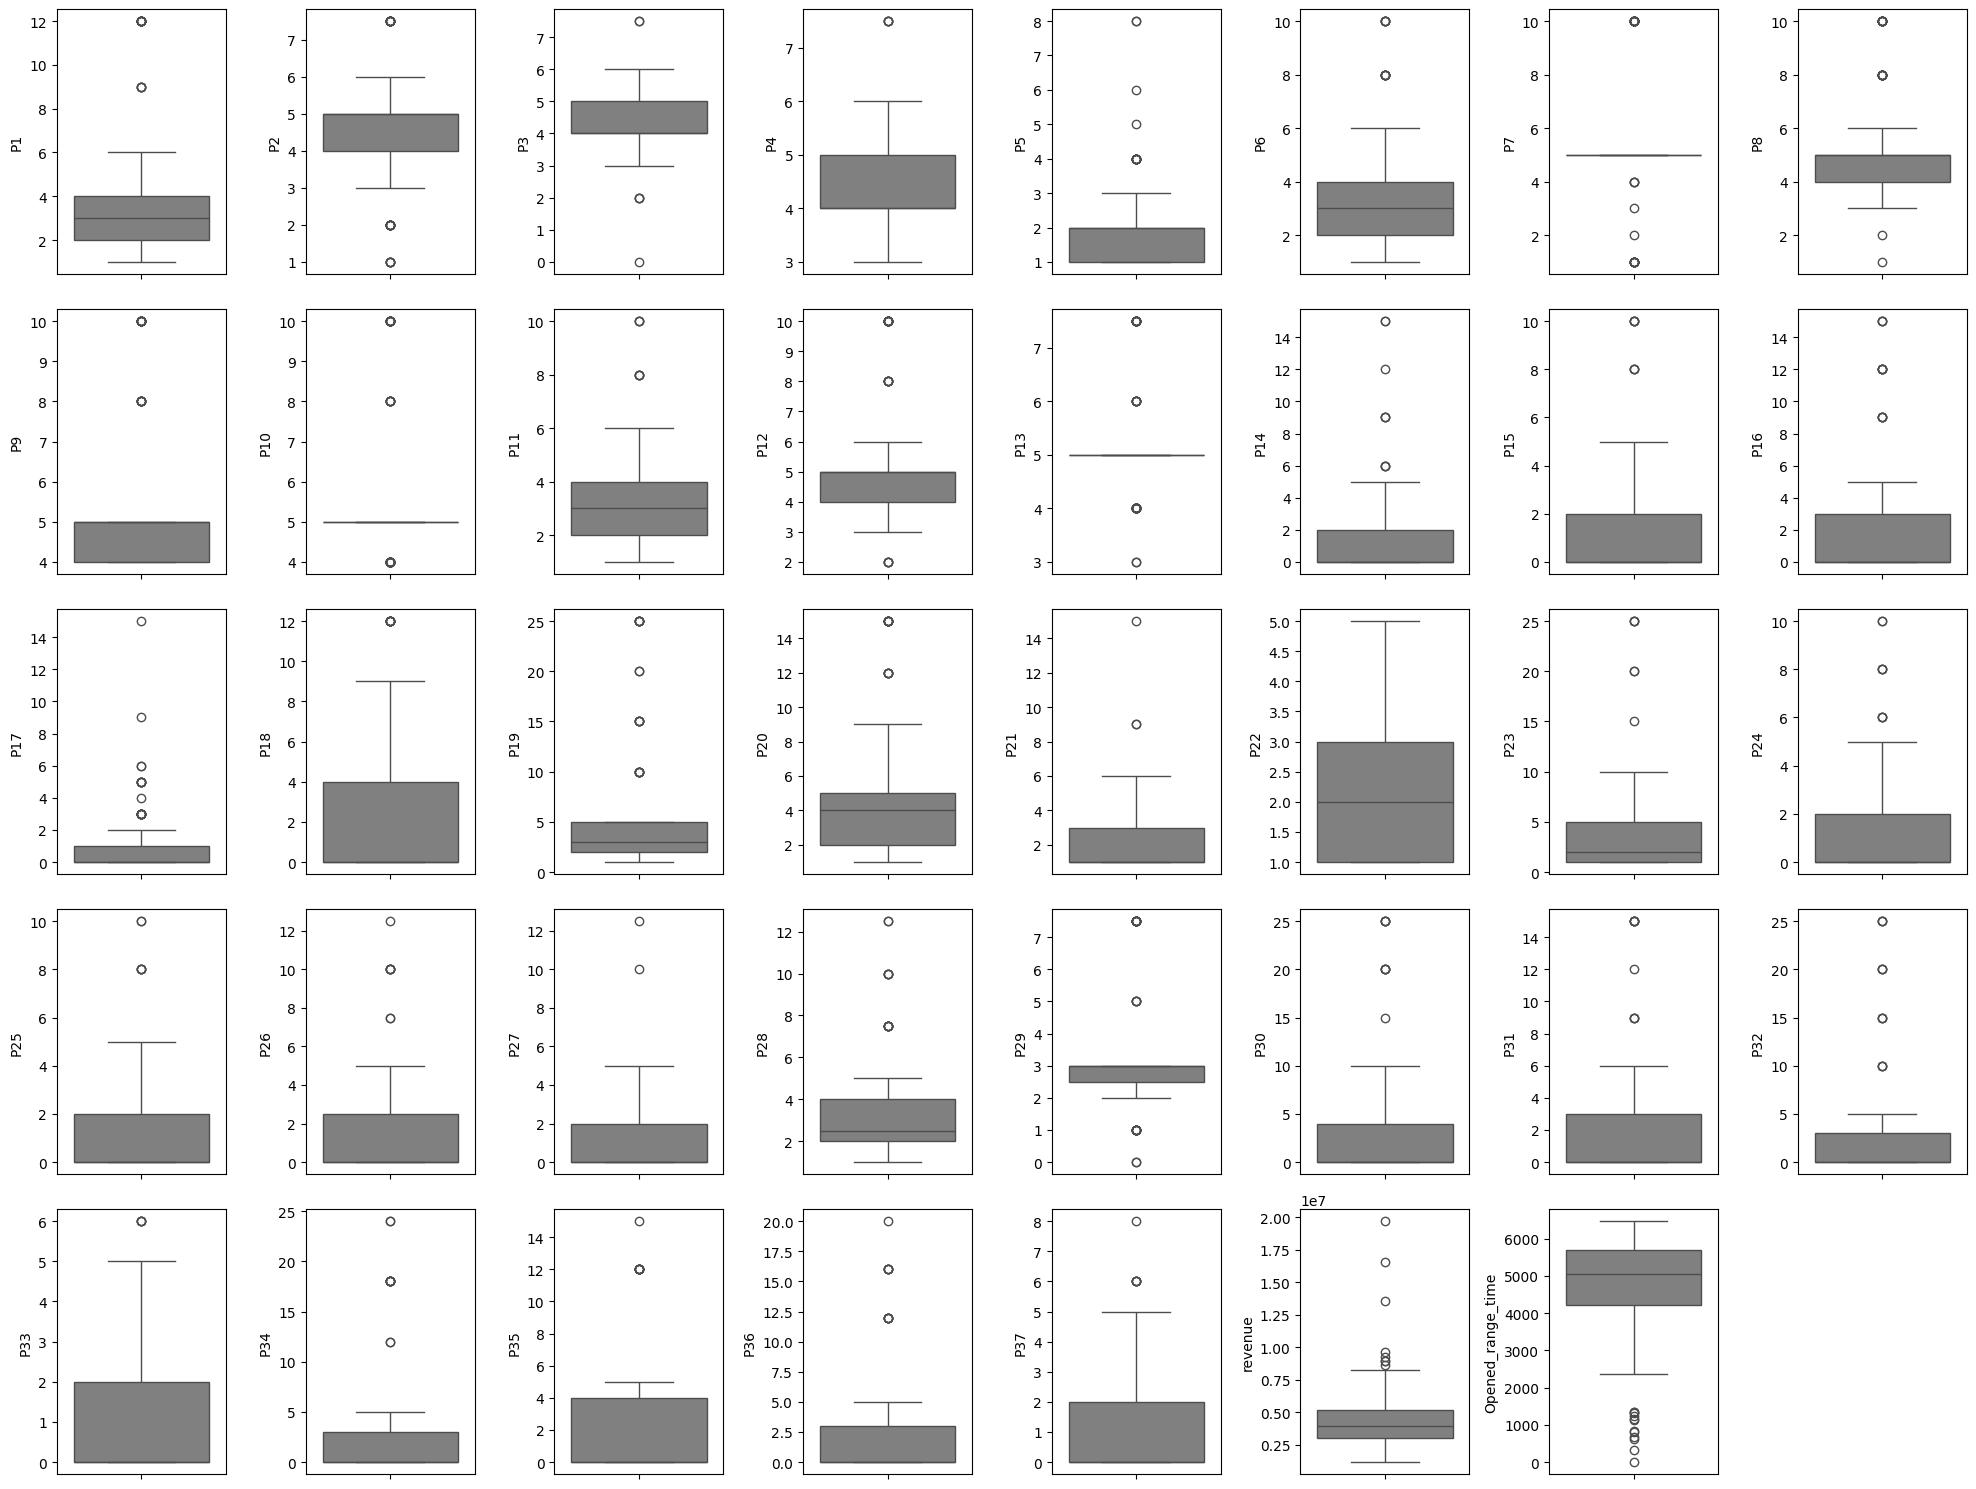

In [14]:
# cols1 = df.drop(columns=['price']).select_dtypes(['int64', 'float64']).columns
cols1 = df.select_dtypes(['int64', 'float64']).columns

fig, axs = plt.subplots(5,8, figsize = (20, 15))
for index, col in enumerate(cols1):
    sns.boxplot(data= df[col], ax= axs[index//8, index%8], color= 'gray' )
fig.delaxes(ax= axs[4,7])
# fig.delaxes(ax= axs[4,6])

plt.tight_layout()
plt.show()

<h2 style= "color:orange;"> Analysis againts Revenue </h2>

### Correlation between revenue and others

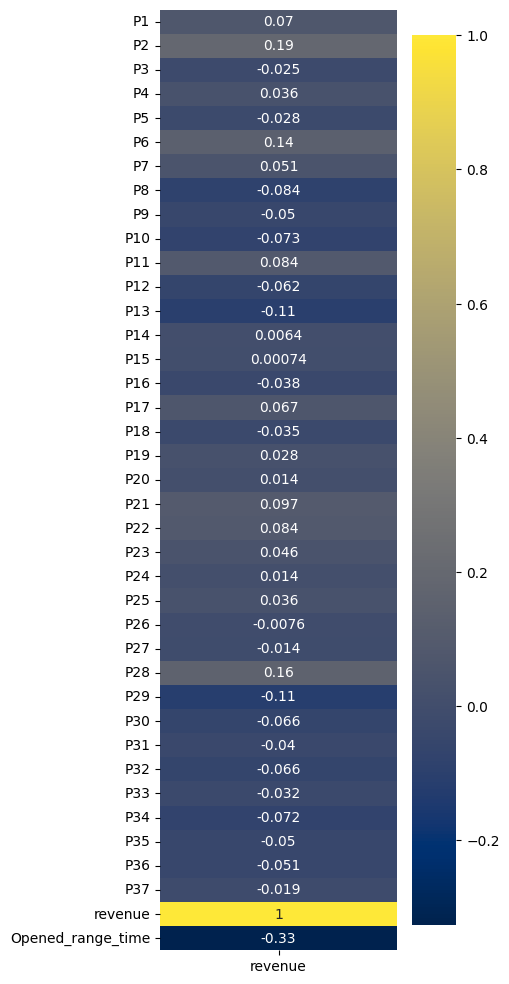

In [15]:
plt.figure(figsize=[5, 10])
sns.heatmap(data = df.select_dtypes(['int64', 'float64']).corr().loc[:,['revenue']], annot=True, cmap = 'cividis') #annot_kws={"rotation": 90})
plt.tight_layout()

In [16]:
df.select_dtypes(['int64', 'float64']).corr().loc[:,['revenue']]['revenue'].mean()


0.01952801091345474

Mean of correlation values is 0.019? <br>
=> Independent variables may not affect significantly to dependent variables

<h2 style = 'color: blue'> Preprocessing </h2>

In [17]:
# Handle duplicates
df.drop_duplicates()

,City,Type,P1,P2,P3,P4,P5,P6,P7,P8,...,P31,P32,P33,P34,P35,P36,P37,revenue,Opened_range_time,City_Group
0,İstanbul,IL,4,5.0,4.0,4.0,2,2,5,4,...,3,4,5,5,4,3,4,5653753.0,1165,Big Cities
1,Ankara,FC,4,5.0,4.0,4.0,1,2,5,5,...,0,0,0,0,0,0,0,6923131.0,4299,Big Cities
2,Diyarbakır,IL,2,4.0,2.0,5.0,2,3,5,5,...,0,0,0,0,0,0,0,2055379.0,6149,Other
3,Tokat,IL,6,4.5,6.0,6.0,4,4,10,8,...,12,10,6,18,12,12,6,2675511.0,5748,Other
4,Gaziantep,IL,3,4.0,3.0,4.0,2,2,5,5,...,1,3,2,3,4,3,3,4316715.0,4749,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,Trabzon,FC,2,3.0,3.0,5.0,4,2,4,4,...,0,0,0,0,0,0,0,5787594.0,4431,Other
133,İzmir,FC,4,5.0,4.0,4.0,2,3,5,4,...,0,0,0,0,0,0,0,9262754.0,3809,Big Cities
134,Kayseri,FC,3,4.0,4.0,4.0,2,3,5,5,...,0,0,0,0,0,0,0,2544857.0,3713,Other
135,İstanbul,FC,4,5.0,4.0,5.0,2,2,5,5,...,0,0,0,0,0,0,0,7217634.0,5287,Big Cities


In [18]:
input = df.drop(columns= ['revenue'])
output = df['revenue']

In [19]:
#Divide train and test data
X_train,X_test, y_train, y_test = train_test_split(input, output, test_size= 0.2, shuffle= True, random_state= 27)

### For numerical columns

In [20]:
def log_transform(X):
    X = X.apply(lambda x: np.log(x+3))
    return X

def linear_scaling(X):
    min_value = X.min(axis = 0)
    max_value = X.max(axis = 0)
    X = (X-min_value) / (max_value - min_value)
    return X

def to_dataframe(X):
    return pd.DataFrame(X, columns=X.columns)

In [21]:
preprocessing_pipeline_numerical = Pipeline([('log_transformation', FunctionTransformer(func= log_transform)),
                                             ("standardize", StandardScaler()),
                                             ("linear_scaling", FunctionTransformer(func=linear_scaling, validate= True))])

X_train_preprocessed_numerical = preprocessing_pipeline_numerical.fit_transform(X_train.select_dtypes(include = ['int64', 'float64']))
X_test_preprocessed_numerical = preprocessing_pipeline_numerical.transform(X_test.select_dtypes(include= ['int64', 'float64']))

In [22]:
X_train_preprocessed_numerical = pd.DataFrame(data= X_train_preprocessed_numerical, columns= X_train.select_dtypes(include = ['int64', 'float64']).columns)
X_test_preprocessed_numerical = pd.DataFrame(data= X_test_preprocessed_numerical, columns= X_test.select_dtypes(include = ['int64', 'float64']).columns)

### For categorical columns

In [23]:
def encode(X):
    cat_cols_name = X.select_dtypes('object').columns
    X_encoded = pd.DataFrame()
    for col in cat_cols_name:
        labling = LabelEncoder()
        X_encoded[col] = labling.fit_transform(X[col])
    return X_encoded

In [24]:
preprocessin_pipeline_categorical = Pipeline([("encoding", FunctionTransformer(func= encode))])
X_test_preprocessed_categorical = preprocessin_pipeline_categorical.fit_transform(X_test)
X_train_preprocessed_categorical = preprocessin_pipeline_categorical.fit_transform(X_train)

In [25]:
X_test_preprocessed = pd.concat([X_test_preprocessed_numerical, X_test_preprocessed_categorical], axis = 1)
X_train_preprocessed = pd.concat([X_train_preprocessed_numerical, X_train_preprocessed_categorical], axis= 1)

<h2 style = 'color: blue'> Deploy Model and Evaluate</h2>

In [26]:
Evaluate = {"LinearRegression": [], "KNeighborRegression": [], "RandomForest": []}

### Linear Regression model (Base)

In [27]:
linear_model = LinearRegression()
linear_model.fit(X_train_preprocessed, y_train)
y_train_pred = linear_model.predict(X_train_preprocessed)
y_test_pred = linear_model.predict(X_test_preprocessed)
# Output of data: "revenue" has oulier => using MAE
print(f"In term of training: {mean_absolute_error(y_pred= y_train_pred, y_true= y_train)}")
print(f"In term of testing: {mean_absolute_error(y_pred= y_test_pred, y_true= y_test)}")
print(f"Mean of y_train: {y_train.mean()}")
print(f"Mean of y_test: {y_test.mean()}")

In term of training: 1325300.5980262705
In term of testing: 3527993.632961403
Mean of y_train: 4216079.743119266
Mean of y_test: 5377902.714285715


MAE(Training) << mean(revenue) (Training)  <br>
=> Model has good performance at training data. <br>
<br>
MAE(Testing) << mean(revenue) (Testing) <br>
=> Model has good performance at testing data.

In [28]:
Evaluate['LinearRegression'].extend([mean_absolute_error(y_pred= y_train_pred, y_true= y_train), mean_absolute_error(y_pred= y_test_pred, y_true= y_test)])

### Multiple Linear Regression model

In [29]:
import statsmodels.formula.api as smf

mlr = smf.ols(formula = 'revenue ~ P1 + P2 + P3 + P4 + P5 + P6 + P7 + P8 + P9 + P10 + P11 + P12 + P13 + P14 + P15 + P16 + P17 + P18 + P19 + P20 + P21 + P22 + P23 + P24 + P25 + P26 + P27 + P28 + P29 + P30 + P31 + P32 + P33 + P34 + P35 + P36 + P37 + Opened_range_time + Type + City_Group', data = df).fit()
print(mlr.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.353
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     1.267
Date:                Sun, 30 Jun 2024   Prob (F-statistic):              0.174
Time:                        13:19:07   Log-Likelihood:                -2186.4
No. Observations:                 137   AIC:                             4457.
Df Residuals:                      95   BIC:                             4579.
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            6.878e+06   5

F-statistic = 1.267 <br>
p-value of mlr =  0.174 => This model has no statistical meaning <br>
=> Reject model mlr

In [30]:
y_train_pred = mlr.predict(pd.concat([X_train_preprocessed.drop(columns= ['City', 'Type', 'City_Group']),X_train[['City', 'Type', 'City_Group']].reset_index().drop(columns = ['index'])], axis= 1))
y_test_pred = mlr.predict(pd.concat([X_test_preprocessed.drop(columns= ['City', 'Type', 'City_Group']),X_test[['City', 'Type', 'City_Group']].reset_index().drop(columns = ['index'])], axis = 1))
# Output of data: "revenue" has oulier => using MAE
print(f"In term of training: {mean_absolute_error(y_pred= y_train_pred, y_true= y_train)}")
print(f"In term of testing: {mean_absolute_error(y_pred= y_test_pred, y_true= y_test)}")
print(f"Mean of y_train: {y_train.mean()}")
print(f"Mean of y_test: {y_test.mean()}")


In term of training: 5249851.477238318
In term of testing: 4810390.465060507
Mean of y_train: 4216079.743119266
Mean of y_test: 5377902.714285715


MAE(Training) > mean(revenue) (Training)  <br>
=> Model has bad performance at training data. <br>
<br>
MAE(Testing) << mean(revenue) (Testing) <br>
=> Model has good performance at testing data.

### KNeighborRegression model 

<h4 style = 'color: green'> Find number of k </h4>

k = 2:
 MAE_train = 1067178.4633027522
 MAE_test = 2062324.482142857
k = 3:
 MAE_train = 1198589.8134556573
 MAE_test = 2123032.511904762
k = 4:
 MAE_train = 1228827.7110091744
 MAE_test = 2157146.1696428573
k = 5:
 MAE_train = 1297550.6733944952
 MAE_test = 2129989.764285714
k = 6:
 MAE_train = 1305006.0733944958
 MAE_test = 2113054.339285714
k = 7:
 MAE_train = 1300596.5937090435
 MAE_test = 2081546.6275510206
k = 8:
 MAE_train = 1332055.5481651376
 MAE_test = 2090750.8080357143
k = 9:
 MAE_train = 1355844.0356778798
 MAE_test = 2111186.075396825
k = 10:
 MAE_train = 1379198.480733945
 MAE_test = 2111319.45


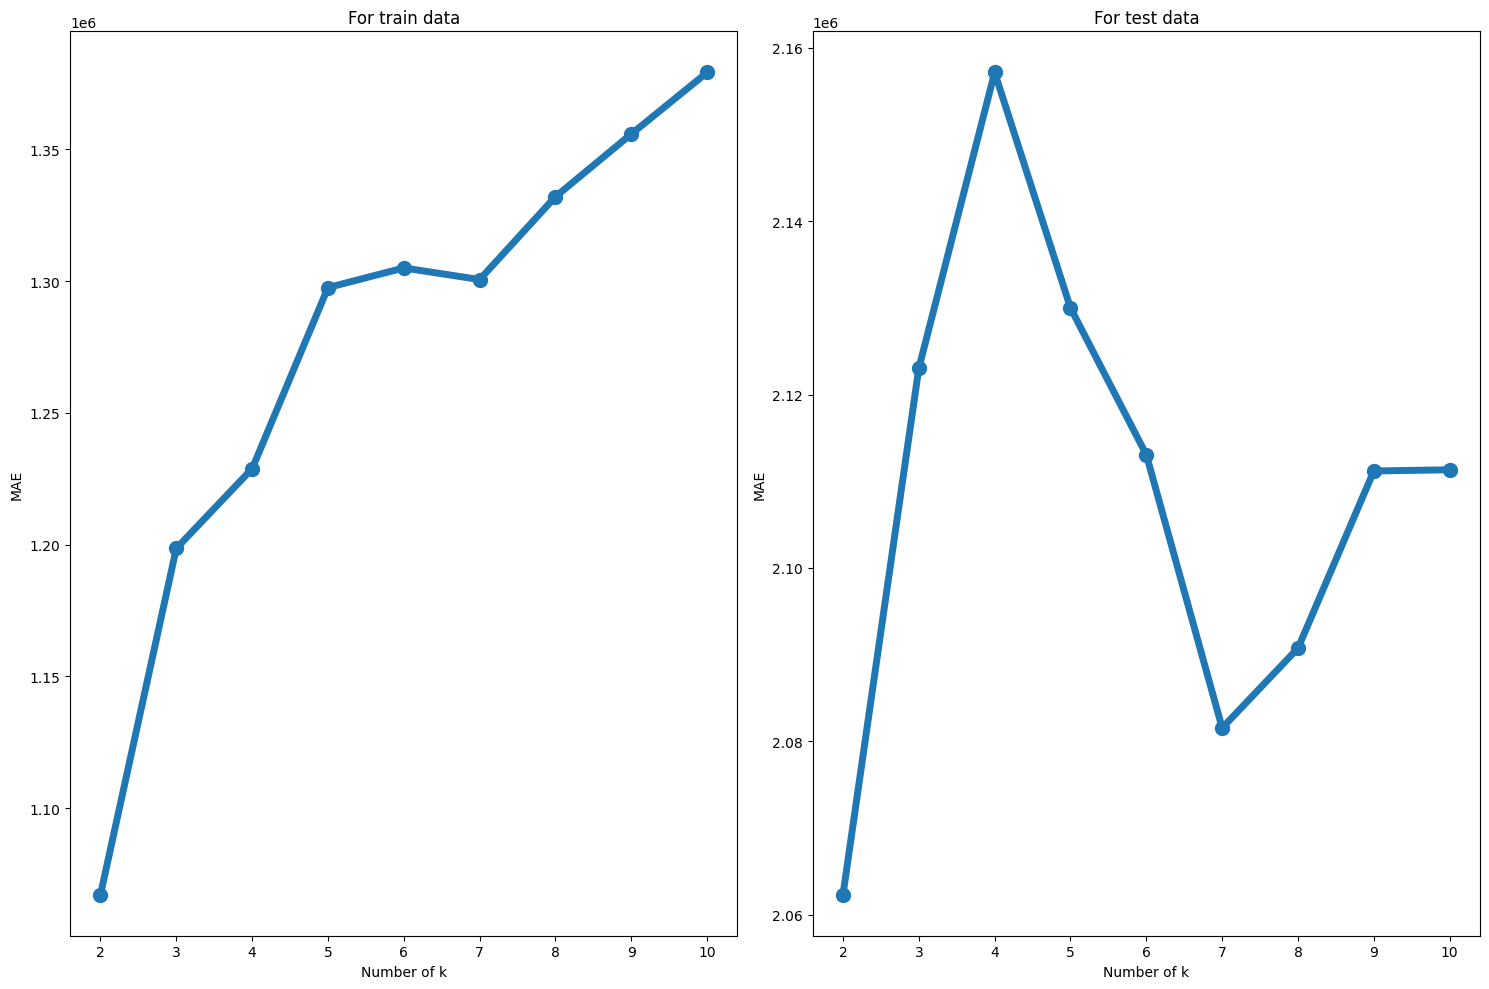

In [31]:
mae_train = []
mae_test = []
for k in range(2, 11):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_preprocessed, y_train)
    y_train_pred = knn.predict(X_train_preprocessed)
    y_test_pred = knn.predict(X_test_preprocessed)
    print(f"k = {k}:\n MAE_train = {mean_absolute_error(y_pred=y_train_pred, y_true= y_train)}\n MAE_test = {mean_absolute_error(y_pred=y_test_pred, y_true= y_test)}")
    mae_train.append(mean_absolute_error(y_pred=y_train_pred, y_true= y_train))
    mae_test.append(mean_absolute_error(y_pred=y_test_pred, y_true= y_test))

fig, axs = plt.subplots(1, 2, figsize = (15, 10))

axs[0].plot(range(2,11), mae_train, marker = "o", lw = 5, markersize = 10)
axs[0].set_xlabel("Number of k")
axs[0].set_ylabel("MAE")
axs[0].set_title("For train data")

axs[1].plot(range(2,11), mae_test, marker = "o", lw = 5, markersize = 10)
axs[1].set_xlabel("Number of k")
axs[1].set_ylabel("MAE")
axs[1].set_title("For test data")

plt.tight_layout()
plt.show()

In [32]:
knn = KNeighborsRegressor(n_neighbors= 2)
knn.fit(X_train_preprocessed, y_train)
y_train_pred = knn.predict(X_train_preprocessed)
y_test_pred = knn.predict(X_test_preprocessed)
# Output of data: "revenue" has oulier => using MAE
print(f"In term of training: {mean_absolute_error(y_pred= y_train_pred, y_true= y_train)}")
print(f"In term of testing: {mean_absolute_error(y_pred= y_test_pred, y_true= y_test)}")
print(f"Mean of y_train: {y_train.mean()}")
print(f"Mean of y_test: {y_test.mean()}")

In term of training: 1067178.4633027522
In term of testing: 2062324.482142857
Mean of y_train: 4216079.743119266
Mean of y_test: 5377902.714285715


MAE(Training) << mean(revenue) (Training)  <br>
=> Model has good performance at training data. <br>
<br>
MAE(Testing) << mean(revenue) (Testing) <br>
=> Model has good performance at testing data.

In [33]:
Evaluate['KNeighborRegression'].extend([mean_absolute_error(y_pred= y_train_pred, y_true= y_train), mean_absolute_error(y_pred= y_test_pred, y_true= y_test)])

### RandomForest model 

In [34]:
rf_model = RandomForestRegressor(random_state= 27)
param_grid = {"n_estimators" : [10, 50, 100, 150, 200]}

grid_search = GridSearchCV(estimator= rf_model, param_grid= param_grid, scoring = 'neg_mean_absolute_error', cv= 5, n_jobs= -1)
grid_search.fit(X_train_preprocessed, y_train)
print(f"Best n_estimator: {grid_search.best_params_['n_estimators']}")

Best n_estimator: 50


In [35]:
grid_search.best_estimator_.fit(X_train_preprocessed, y_train)
y_train_pred = grid_search.best_estimator_.predict(X_train_preprocessed)
y_test_pred = grid_search.best_estimator_.predict(X_test_preprocessed)
# Output of data: "revenue" has oulier => using MAE
print(f"In term of training: {mean_absolute_error(y_pred= y_train_pred, y_true= y_train)}")
print(f"In term of testing: {mean_absolute_error(y_pred= y_test_pred, y_true= y_test)}")
print(f"Mean of y_train: {y_train.mean()}")
print(f"Mean of y_test: {y_test.mean()}")

In term of training: 564684.466055046
In term of testing: 1874973.3214285711
Mean of y_train: 4216079.743119266
Mean of y_test: 5377902.714285715


MAE(Training) << mean(revenue) (Training)  <br>
=> Model has good performance at training data. <br>
<br>
MAE(Testing) << mean(revenue) (Testing) <br>
=> Model has good performance at testing data.

In [36]:
Evaluate['RandomForest'].extend([mean_absolute_error(y_pred= y_train_pred, y_true= y_train), mean_absolute_error(y_pred= y_test_pred, y_true= y_test)])

In [37]:
print(f"Mean of y_train: {y_train.mean()}")
print(f"Mean of y_test: {y_test.mean()}")
Evaluate_table = pd.DataFrame(data = Evaluate, index= ['For train', 'For test'])
print(Evaluate_table)

Mean of y_train: 4216079.743119266
Mean of y_test: 5377902.714285715
           LinearRegression  KNeighborRegression  RandomForest
For train      1.325301e+06         1.067178e+06  5.646845e+05
For test       3.527994e+06         2.062324e+06  1.874973e+06
